In [1]:
#Incluyendo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga del dataset

In [ ]:
df = pd.read_csv('prompt_engineering_dataset.csv')

In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree..."
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...
3,Why do you think education is important?,Question,40,I believe education is important because it em...
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce..."
...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal..."
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce..."


In [ ]:
df.describe()

,Prompt_Length
count,5010.000000
mean,29.420359
std,7.640619
min,15.000000
25%,22.000000
50%,28.000000
75%,38.000000
max,40.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Prompt         5010 non-null   object
 1   Prompt_Type    5010 non-null   object
 2   Prompt_Length  5010 non-null   int64 
 3   Response       5010 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


# Limpieza de datos

In [ ]:
# cantidad de nulos para el primer dataset
cantidad_nulos = (df.isnull().sum())
print(cantidad_nulos)

Prompt           0
Prompt_Type      0
Prompt_Length    0
Response         0
dtype: int64


In [ ]:
import re
import nltk

In [ ]:
pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''

In [ ]:
# Función para aplicar regex sobre el texto y clasificar los tokens
def extract_tokens(text):

    if not isinstance(text, str):
        return pd.Series({
            'abbreviations': '',
            'words': '',
            'currency_percent': '',
            'ellipsis': '',
            'punctuation': ''
        })


    matches = re.findall(pattern, text)

    abbreviations = []
    words = []
    currency_percent = []
    ellipsis = []
    punctuation = []

    for match in matches:
        if re.match(r'(?:[A-Z]\.)+', match):  # Abreviaciones
            abbreviations.append(match)
        elif re.match(r'\w+(?:-\w+)*', match):  # Palabras con guiones opcionales
            words.append(match)
        elif re.match(r'\$?\d+(?:\.\d+)?%?', match):  # Moneda y porcentajes
            currency_percent.append(match)
        elif match == '...':  # Elipsis
            ellipsis.append(match)
        elif re.match(r'[][.,;"\'?():-_`]', match):  # Puntuación
            punctuation.append(match)

    return pd.Series({
        'abbreviations': ', '.join(abbreviations),
        'words': ', '.join(words),
        'currency_percent': ', '.join(currency_percent),
        'ellipsis': ', '.join(ellipsis),
        'punctuation': ', '.join(punctuation)
    })

# Lista de columnas de texto en las que deseas aplicar el regex
columns_to_tokenize = ['Prompt', 'Response']

# Iterar sobre cada columna y aplicar la función extract_tokens
for column in columns_to_tokenize:
    # Aplicar extract_tokens a cada columna de texto
    tokenized_df = df[column].apply(extract_tokens)

    # Cambiar los nombres de las columnas para evitar sobreescribir
    tokenized_df = tokenized_df.add_prefix(f"{column}_")

    # Unir el DataFrame original con las nuevas columnas tokenizadas
    df = pd.concat([df, tokenized_df], axis=1)


In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_abbreviations,Prompt_words,Prompt_currency_percent,Prompt_ellipsis,Prompt_punctuation,Response_abbreviations,Response_words,Response_currency_percent,Response_ellipsis,Response_punctuation
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...",,"Where, do, you, see, yourself, in, 5, years",,,?,,"In, 5, years, I, see, myself, advancing, in, m...",,,",, ."
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,,"Summarize, the, plot, of, Romeo, and, Juliet",,,.,,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",,,.
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,,"I, m, feeling, sad, today",,,"', .",,"I, m, sorry, to, hear, that, you, re, feeling,...",,,"', ', ., ', ,, ', ."
3,Why do you think education is important?,Question,40,I believe education is important because it em...,,"Why, do, you, think, education, is, important",,,?,,"I, believe, education, is, important, because,...",,,.
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...",,"List, the, ingredients, for, making, pizza",,,.,,"To, make, pizza, you, ll, need, dough, tomato,...",,,",, ', ,, ,, ,, ,, ,, ."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,,"Describe, the, process, of, photosynthesis",,,.,,"Photosynthesis, is, the, process, by, which, g...",,,",, ."
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,,"I, m, feeling, sad, today",,,"', .",,"I, m, sorry, to, hear, that, you, re, feeling,...",,,"', ', ., ', ,, ', ."
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...",,"How, do, you, cook, pasta",,,?,,"To, cook, pasta, you, need, to, boil, water, a...",,,",, ,, ,, ."
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...",,"List, the, ingredients, for, making, pizza",,,.,,"To, make, pizza, you, ll, need, dough, tomato,...",,,",, ', ,, ,, ,, ,, ,, ."


In [ ]:
# Reemplazar celdas con espacios en blanco o cadenas vacías por NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

<ipython-input-43-7d013c7d4e1e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [ ]:
empty_columns = df.columns[df.isna().all()]
print("Columnas completamente vacías:", empty_columns)

Columnas completamente vacías: Index(['Prompt_abbreviations', 'Prompt_currency_percent', 'Prompt_ellipsis',
       'Response_abbreviations', 'Response_currency_percent',
       'Response_ellipsis'],
      dtype='object')


In [ ]:
#Eliminar columnas
columnas_eliminar = ['Prompt_abbreviations', 'Prompt_currency_percent', 'Prompt_ellipsis','Response_abbreviations','Response_currency_percent','Response_ellipsis']
df.drop(columns=columnas_eliminar, inplace=True)

# Tokenización

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Descargar el tokenizador punkt
nltk.download('punkt_tab')
from tqdm import tqdm  # Importar la biblioteca tqdm para la barra de progreso
tqdm.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Aplicar tokenización a las columnas relevantes
text_columns = ['Prompt', 'Response']  # Lista de columnas a tokenizar

for col in text_columns:
    # Convertir a string y manejar NaN
    df[col] = df[col].fillna('').astype(str)  # Reemplazar NaN por cadena vacía
    df[col + '_tokens'] = df[col].progress_apply(word_tokenize)


100%|██████████| 5010/5010 [00:01<00:00, 4977.30it/s]


In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_words,Prompt_punctuation,Response_words,Response_punctuation,Prompt_tokens,Response_tokens
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...","Where, do, you, see, yourself, in, 5, years",?,"In, 5, years, I, see, myself, advancing, in, m...",",, .","[Where, do, you, see, yourself, in, 5, years, ?]","[In, 5, years, ,, I, see, myself, advancing, i..."
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,"Summarize, the, plot, of, Romeo, and, Juliet",.,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",.,"[Summarize, the, plot, of, Romeo, and, Juliet, .]","[Romeo, and, Juliet, is, a, tragedy, by, Willi..."
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli..."
3,Why do you think education is important?,Question,40,I believe education is important because it em...,"Why, do, you, think, education, is, important",?,"I, believe, education, is, important, because,...",.,"[Why, do, you, think, education, is, important...","[I, believe, education, is, important, because..."
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,..."
...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,"Describe, the, process, of, photosynthesis",.,"Photosynthesis, is, the, process, by, which, g...",",, .","[Describe, the, process, of, photosynthesis, .]","[Photosynthesis, is, the, process, by, which, ..."
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli..."
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...","How, do, you, cook, pasta",?,"To, cook, pasta, you, need, to, boil, water, a...",",, ,, ,, .","[How, do, you, cook, pasta, ?]","[To, cook, pasta, ,, you, need, to, boil, wate..."
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,..."


# Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

# Asegúrate de haber descargado las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # O 'english' según sea necesario

# Función para contar y listar stopwords en el texto
def extract_stopwords(text):
    if isinstance(text, str):
        # Tokenizar el texto
        tokens = text.split()
        # Filtrar stopwords
        found_stopwords = [token for token in tokens if token.lower() in stop_words]
        # Contar stopwords
        stopword_count = len(found_stopwords)
        return stopword_count, ', '.join(found_stopwords)  # Retorna el conteo y las stopwords encontradas
    return 0, ''  # Si no es un texto válido

# Lista de columnas de texto en las que deseas contar stopwords
columns_to_analyze = ['Prompt', 'Response']

# Iterar sobre cada columna y contar stopwords
for column in columns_to_analyze:
    df[column + '_stopword_count'], df[column + '_stopwords'] = zip(*df[column].apply(extract_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_words,Prompt_punctuation,Response_words,Response_punctuation,Prompt_tokens,Response_tokens,Prompt_stopword_count,Prompt_stopwords,Response_stopword_count,Response_stopwords
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...","Where, do, you, see, yourself, in, 5, years",?,"In, 5, years, I, see, myself, advancing, in, m...",",, .","[Where, do, you, see, yourself, in, 5, years, ?]","[In, 5, years, ,, I, see, myself, advancing, i...",5,"Where, do, you, yourself, in",9,"In, I, myself, in, my, and, down, with, a"
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,"Summarize, the, plot, of, Romeo, and, Juliet",.,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",.,"[Summarize, the, plot, of, Romeo, and, Juliet, .]","[Romeo, and, Juliet, is, a, tragedy, by, Willi...",3,"the, of, and",8,"and, is, a, by, that, the, of, their"
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,,12,"to, that, you're, It's, to, have, off, and, it..."
3,Why do you think education is important?,Question,40,I believe education is important because it em...,"Why, do, you, think, education, is, important",?,"I, believe, education, is, important, because,...",.,"[Why, do, you, think, education, is, important...","[I, believe, education, is, important, because...",4,"Why, do, you, is",6,"I, is, because, it, and, to"
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,...",2,"the, for",6,"To, you'll, and, your, of, and"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,"Describe, the, process, of, photosynthesis",.,"Photosynthesis, is, the, process, by, which, g...",",, .","[Describe, the, process, of, photosynthesis, .]","[Photosynthesis, is, the, process, by, which, ...",2,"the, of",7,"is, the, by, which, and, into, and"
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,,12,"to, that, you're, It's, to, have, off, and, it..."
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...","How, do, you, cook, pasta",?,"To, cook, pasta, you, need, to, boil, water, a...",",, ,, ,, .","[How, do, you, cook, pasta, ?]","[To, cook, pasta, ,, you, need, to, boil, wate...",3,"How, do, you",7,"To, you, to, and, then, the, for"
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,...",2,"the, for",6,"To, you'll, and, your, of, and"


# Lematización

In [ ]:
# Para evitar el error que podría ocurrir si intentamos ejecutar la lematización
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Asegúrate de haber descargado los recursos necesarios de NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para soporte de varios idiomas

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar el texto
def lemmatize_text(text):
    if isinstance(text, str):  # Comprobar si el texto es una cadena
        # Tokenizar el texto
        tokens = text.split()
        # Lematizar cada token
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        # Unir los tokens lematizados en una cadena
        return ' '.join(lemmatized_tokens)
    return ''  # Si no es un texto válido, devolver una cadena vacía

# Lista de columnas a lematizar
columns_to_lemmatize = ['Prompt', 'Response']

# Aplicar la lematización a cada columna seleccionada
for column in columns_to_lemmatize:
    df[column + '_lemmatized'] = df[column].apply(lemmatize_text)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_words,Prompt_punctuation,Response_words,Response_punctuation,Prompt_tokens,Response_tokens,Prompt_stopword_count,Prompt_stopwords,Response_stopword_count,Response_stopwords,Prompt_lemmatized,Response_lemmatized
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...","Where, do, you, see, yourself, in, 5, years",?,"In, 5, years, I, see, myself, advancing, in, m...",",, .","[Where, do, you, see, yourself, in, 5, years, ?]","[In, 5, years, ,, I, see, myself, advancing, i...",5,"Where, do, you, yourself, in",9,"In, I, myself, in, my, and, down, with, a",Where do you see yourself in 5 years?,"In 5 years, I see myself advancing in my caree..."
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,"Summarize, the, plot, of, Romeo, and, Juliet",.,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",.,"[Summarize, the, plot, of, Romeo, and, Juliet, .]","[Romeo, and, Juliet, is, a, tragedy, by, Willi...",3,"the, of, and",8,"and, is, a, by, that, the, of, their",Summarize the plot of Romeo and Juliet.,Romeo and Juliet is a tragedy by William Shake...
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,,12,"to, that, you're, It's, to, have, off, and, it...",I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...
3,Why do you think education is important?,Question,40,I believe education is important because it em...,"Why, do, you, think, education, is, important",?,"I, believe, education, is, important, because,...",.,"[Why, do, you, think, education, is, important...","[I, believe, education, is, important, because...",4,"Why, do, you, is",6,"I, is, because, it, and, to",Why do you think education is important?,I believe education is important because it em...
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,...",2,"the, for",6,"To, you'll, and, your, of, and",List the ingredient for making pizza.,"To make pizza, you'll need dough, tomato sauce..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,"Describe, the, process, of, photosynthesis",.,"Photosynthesis, is, the, process, by, which, g...",",, .","[Describe, the, process, of, photosynthesis, .]","[Photosynthesis, is, the, process, by, which, ...",2,"the, of",7,"is, the, by, which, and, into, and",Describe the process of photosynthesis.,Photosynthesis is the process by which green p...
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,,12,"to, that, you're, It's, to, have, off, and, it...",I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...","How, do, you, cook, pasta",?,"To, cook, pasta, you, need, to, boil, water, a...",",, ,, ,, .","[How, do, you, cook, pasta, ?]","[To, cook, pasta, ,, you, need, to, boil, wate...",3,"How, do, you",7,"To, you, to, and, then, the, for",How do you cook pasta?,"To cook pasta, you need to boil water, add sal..."
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, th

In [ ]:
# Reemplazar celdas con espacios en blanco o cadenas vacías por NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
#Cantidad de palabras y caracteres
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

def char_count(text):
    if pd.isna(text):
        return 0
    return len(text)

# Lista de columnas a las que quieres agregar estas métricas
columns = ['Prompt', 'Response']

# Agregar las columnas de cantidad de palabras y caracteres
for col in columns:
    df[f'{col}_word_count'] = df[col].apply(word_count)
    df[f'{col}_char_count'] = df[col].apply(char_count)

In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_words,Prompt_punctuation,Response_words,Response_punctuation,Prompt_tokens,Response_tokens,Prompt_stopword_count,Prompt_stopwords,Response_stopword_count,Response_stopwords,Prompt_lemmatized,Response_lemmatized,Prompt_word_count,Prompt_char_count,Response_word_count,Response_char_count
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...","Where, do, you, see, yourself, in, 5, years",?,"In, 5, years, I, see, myself, advancing, in, m...",",, .","[Where, do, you, see, yourself, in, 5, years, ?]","[In, 5, years, ,, I, see, myself, advancing, i...",5,"Where, do, you, yourself, in",9,"In, I, myself, in, my, and, down, with, a",Where do you see yourself in 5 years?,"In 5 years, I see myself advancing in my caree...",8,37,17,89
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,"Summarize, the, plot, of, Romeo, and, Juliet",.,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",.,"[Summarize, the, plot, of, Romeo, and, Juliet, .]","[Romeo, and, Juliet, is, a, tragedy, by, Willi...",3,"the, of, and",8,"and, is, a, by, that, the, of, their",Summarize the plot of Romeo and Juliet.,Romeo and Juliet is a tragedy by William Shake...,7,39,25,164
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,NaN,12,"to, that, you're, It's, to, have, off, and, it...",I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...,4,22,24,125
3,Why do you think education is important?,Question,40,I believe education is important because it em...,"Why, do, you, think, education, is, important",?,"I, believe, education, is, important, because,...",.,"[Why, do, you, think, education, is, important...","[I, believe, education, is, important, because...",4,"Why, do, you, is",6,"I, is, because, it, and, to",Why do you think education is important?,I believe education is important because it em...,7,40,14,102
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,...",2,"the, for",6,"To, you'll, and, your, of, and",List the ingredient for making pizza.,"To make pizza, you'll need dough, tomato sauce...",6,38,20,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,"Describe, the, process, of, photosynthesis",.,"Photosynthesis, is, the, process, by, which, g...",",, .","[Describe, the, process, of, photosynthesis, .]","[Photosynthesis, is, the, process, by, which, ...",2,"the, of",7,"is, the, by, which, and, into, and",Describe the process of photosynthesis.,Photosynthesis is the process by which green p...,5,39,19,125
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",0,NaN,12,"to, that, you're, It's, to, have, off, and, it...",I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...,4,22,24,125
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...","How, do, you, cook, pasta",?,"To, cook, pasta, you, need, to, boil, water, a...",",, ,, ,, .","[How, do, you, cook, pasta, ?]","[To, cook, pasta, ,, you, need, to, boil, wate...",3,"How, do, you",7,"To, you, to, and, then, the, for",How do you

# Outliers

In [ ]:
# Funciones para calcular cantidad de palabras y caracteres
def word_count(text):
    if pd.isna(text):
        return 0
    return len(text.split())

def char_count(text):
    if pd.isna(text):
        return 0
    return len(text)

# Función para detectar outliers usando el método de IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Lista de columnas de texto
columns = ['Prompt', 'Response']

# Agregar columnas de cantidad de palabras y caracteres
for col in columns:
    df[f'{col}_word_count'] = df[col].apply(word_count)
    df[f'{col}_char_count'] = df[col].apply(char_count)

# Agregar columnas de cantidad de outliers tanto para palabras como para caracteres
for col in columns:
    word_count_col = f'{col}_word_count'
    char_count_col = f'{col}_char_count'

    # Outliers en la cantidad de palabras
    df[f'{col}_word_outliers'] = count_outliers(df[word_count_col])

    # Outliers en la cantidad de caracteres
    df[f'{col}_char_outliers'] = count_outliers(df[char_count_col])

In [ ]:
df

,Prompt,Prompt_Type,Prompt_Length,Response,Prompt_words,Prompt_punctuation,Response_words,Response_punctuation,Prompt_tokens,Response_tokens,...,Prompt_lemmatized,Response_lemmatized,Prompt_word_count,Prompt_char_count,Response_word_count,Response_char_count,Prompt_word_outliers,Prompt_char_outliers,Response_word_outliers,Response_char_outliers
0,Where do you see yourself in 5 years?,Question,37,"In 5 years, I see myself advancing in my caree...","Where, do, you, see, yourself, in, 5, years",?,"In, 5, years, I, see, myself, advancing, in, m...",",, .","[Where, do, you, see, yourself, in, 5, years, ?]","[In, 5, years, ,, I, see, myself, advancing, i...",...,Where do you see yourself in 5 years?,"In 5 years, I see myself advancing in my caree...",8,37,17,89,0,0,0,0
1,Summarize the plot of Romeo and Juliet.,Command,39,Romeo and Juliet is a tragedy by William Shake...,"Summarize, the, plot, of, Romeo, and, Juliet",.,"Romeo, and, Juliet, is, a, tragedy, by, Willia...",.,"[Summarize, the, plot, of, Romeo, and, Juliet, .]","[Romeo, and, Juliet, is, a, tragedy, by, Willi...",...,Summarize the plot of Romeo and Juliet.,Romeo and Juliet is a tragedy by William Shake...,7,39,25,164,0,0,0,0
2,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",...,I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...,4,22,24,125,0,0,0,0
3,Why do you think education is important?,Question,40,I believe education is important because it em...,"Why, do, you, think, education, is, important",?,"I, believe, education, is, important, because,...",.,"[Why, do, you, think, education, is, important...","[I, believe, education, is, important, because...",...,Why do you think education is important?,I believe education is important because it em...,7,40,14,102,0,0,0,0
4,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]","[To, make, pizza, ,, you, 'll, need, dough, ,,...",...,List the ingredient for making pizza.,"To make pizza, you'll need dough, tomato sauce...",6,38,20,128,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Describe the process of photosynthesis.,Command,39,Photosynthesis is the process by which green p...,"Describe, the, process, of, photosynthesis",.,"Photosynthesis, is, the, process, by, which, g...",",, .","[Describe, the, process, of, photosynthesis, .]","[Photosynthesis, is, the, process, by, which, ...",...,Describe the process of photosynthesis.,Photosynthesis is the process by which green p...,5,39,19,125,0,0,0,0
5006,I'm feeling sad today.,Open-ended,22,I'm sorry to hear that you're feeling down. It...,"I, m, feeling, sad, today","', .","I, m, sorry, to, hear, that, you, re, feeling,...","', ', ., ', ,, ', .","[I, 'm, feeling, sad, today, .]","[I, 'm, sorry, to, hear, that, you, 're, feeli...",...,I'm feeling sad today.,I'm sorry to hear that you're feeling down. It...,4,22,24,125,0,0,0,0
5007,How do you cook pasta?,Question,22,"To cook pasta, you need to boil water, add sal...","How, do, you, cook, pasta",?,"To, cook, pasta, you, need, to, boil, water, a...",",, ,, ,, .","[How, do, you, cook, pasta, ?]","[To, cook, pasta, ,, you, need, to, boil, wate...",...,How do you cook pasta?,"To cook pasta, you need to boil water, add sal...",5,22,18,90,0,0,0,0
5008,List the ingredients for making pizza.,Command,38,"To make pizza, you'll need dough, tomato sauce...","List, the, ingredients, for, making, pizza",.,"To, make, pizza, you, ll, need, dough, tomato,...",",, ', ,, ,, ,, ,, ,, .","[List, the, ingredients, for, making, pizza, .]

In [ ]:
df.columns

Index(['Prompt', 'Prompt_Type', 'Prompt_Length', 'Response', 'Prompt_words',
       'Prompt_punctuation', 'Response_words', 'Response_punctuation',
       'Prompt_tokens', 'Response_tokens', 'Prompt_stopword_count',
       'Prompt_stopwords', 'Response_stopword_count', 'Response_stopwords',
       'Prompt_lemmatized', 'Response_lemmatized', 'Prompt_word_count',
       'Prompt_char_count', 'Response_word_count', 'Response_char_count',
       'Prompt_word_outliers', 'Prompt_char_outliers',
       'Response_word_outliers', 'Response_char_outliers'],
      dtype='object')

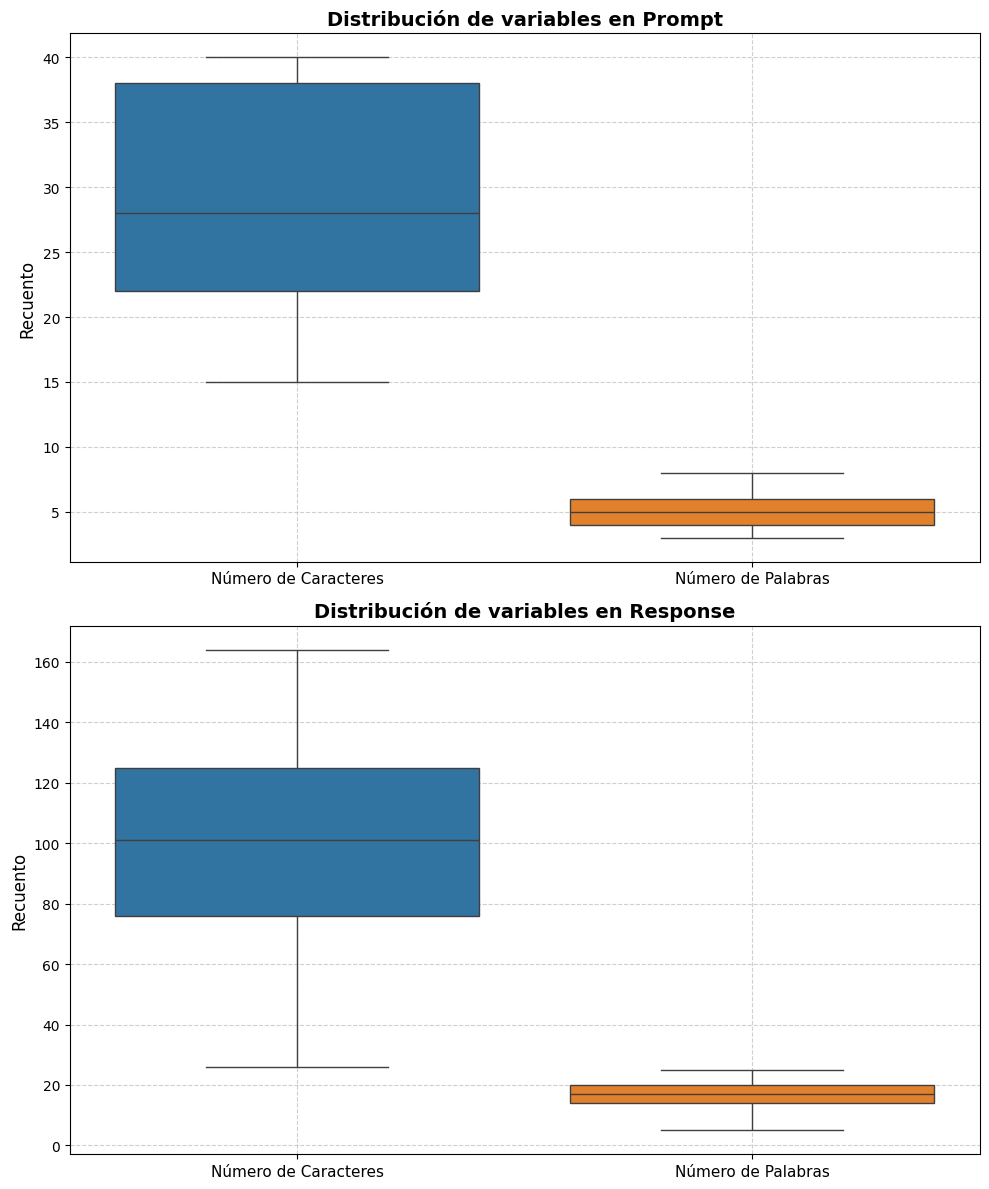

In [ ]:
# Revisamos si hay outliers
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 3 filas, 1 columna

# Boxplot para 'instruction'
# Changed column names to match the ones created earlier
sns.boxplot(data=df[['Prompt_char_count', 'Prompt_word_count']], ax=axes[0])
axes[0].set_ylabel("Recuento", fontsize=12)
axes[0].set_title("Distribución de variables en Prompt", fontsize=14, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

# Boxplot para 'input'
# Changed column names to match the ones created earlier
sns.boxplot(data=df[['Response_char_count', 'Response_word_count']], ax=axes[1])
axes[1].set_ylabel("Recuento", fontsize=12)
axes[1].set_title("Distribución de variables en Response", fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Número de Caracteres', 'Número de Palabras'], fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('df_final.csv', index=False)

# Visualización

    Distribución de número de palabras en Prompt y Response

<ipython-input-204-58b44632e217>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Prompt', 'Response'], y=[df['Prompt_word_count'].mean(), df['Response_word_count'].mean()], palette='pastel')


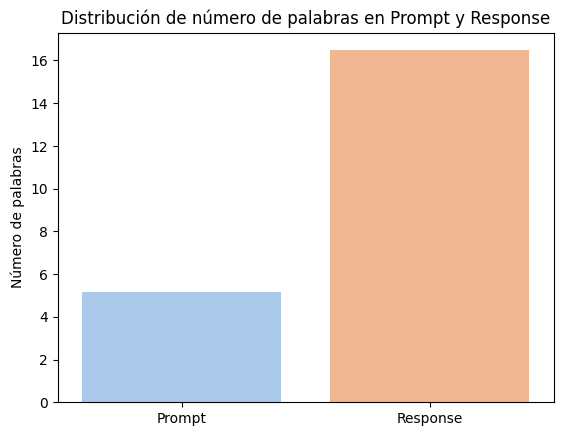

In [ ]:
sns.barplot(x=['Prompt', 'Response'], y=[df['Prompt_word_count'].mean(), df['Response_word_count'].mean()], palette='pastel')
plt.title('Distribución de número de palabras en Prompt y Response')
plt.ylabel('Número de palabras')
plt.show()

Interpretación:

Response tiene más palabras que prompt, lo cual tiene sentido porque generalmente el prompt es mas directo y breve ya que estamos haciendo una pregunta o dando una instrucción. A diferencia de response que por lo general tiene más palabras porque incluye una explicación con detalles e información.

    Distribución de número de palabras en Prompt

<ipython-input-202-97550e260020>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Prompt_word_count', y='count',


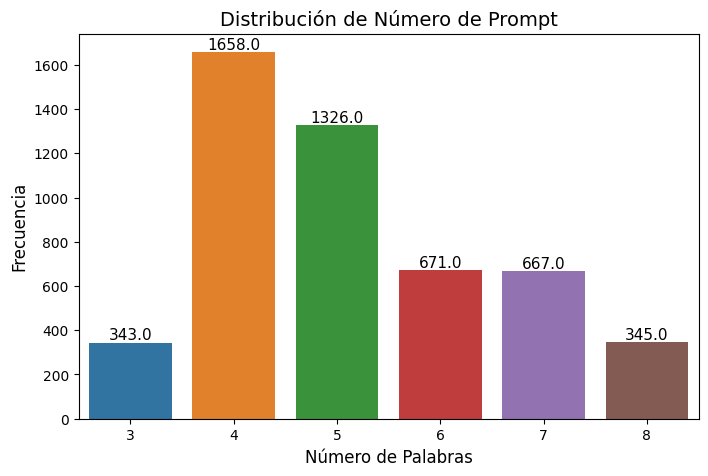

In [ ]:
palette = sns.color_palette(n_colors=len(df['Prompt_word_count'].unique()))
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Prompt_word_count', y='count',
            data=df.groupby('Prompt_word_count').size().to_frame(name='count').reset_index(), palette=palette)

plt.title('Distribución de Número de palabras en Prompt', fontsize=14)
plt.xlabel('Número de Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

Interpretación:

En la gráfica podemos ver como se distribuye la frecuencia de cantidad de palabras para diferentes longitudes del prompt.

Podemos ver que la moda esta en prompts de 4 palabras y existe un descenso gradual en la frecuencia a medida que la longitud de los prompts aumenta.

Podemos concluir que los usuarios tienden a generar prompts más cortos.

    Distribución de número de palabras en Response

<ipython-input-203-31be533a296a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Response_word_count', y='count',


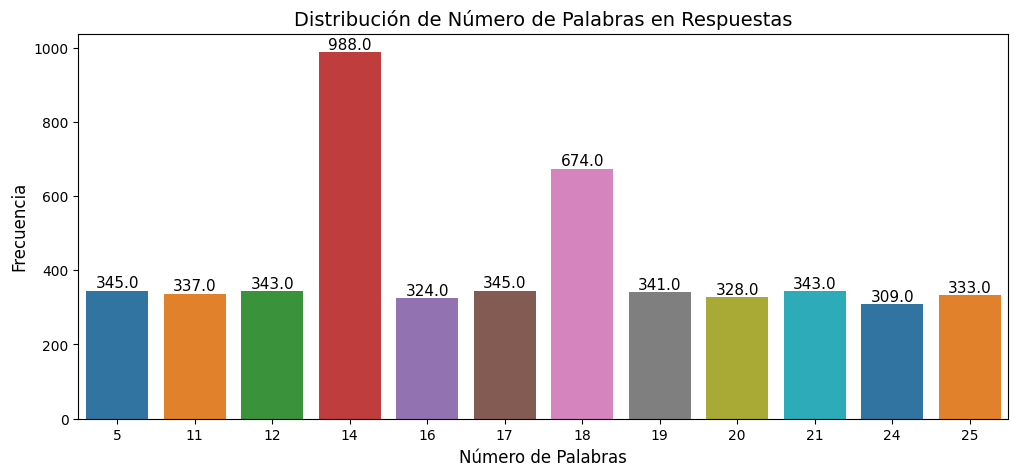

In [ ]:
palette = sns.color_palette(n_colors=len(df['Response_word_count'].unique()))
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Response_word_count', y='count',
            data=df.groupby('Response_word_count').size().to_frame(name='count').reset_index(), palette=palette)

plt.title('Distribución de Número de Palabras en Respuestas', fontsize=14)
plt.xlabel('Número de Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

Interpretación:

En la gráfica podemos ver como se distribuye la frecuencia de cantidad de palabras para diferentes longitudes de respuestas.

Podemos ver que la moda esta en respuestas de 14 palabras.

Hay una tendencia a respuestas medianas frente a las respuestas cortas o largas. Por lo tanto podemos concluir que las respuestas cortas no son lo suficientemente explicativas y las largas podrían ser más extensas de lo necesario.


    ¿Existe una correlación entre la longitud del promt y la longitud del response?

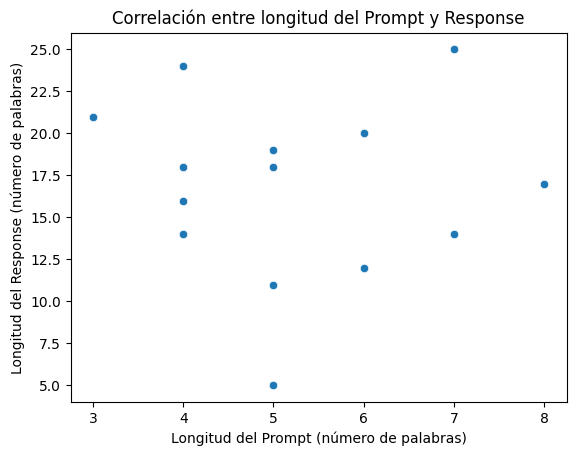

Coeficiente de correlación: -0.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Prompt_word_count', y='Response_word_count', data=df)
plt.title('Correlación entre longitud del Prompt y Response')
plt.xlabel('Longitud del Prompt (número de palabras)')
plt.ylabel('Longitud del Response (número de palabras)')
plt.show()

# Calcular la correlación
correlation = df['Prompt_word_count'].corr(df['Response_word_count'])
print(f'Coeficiente de correlación: {correlation:.2f}')

Interpretación:

Se observa en la gráfica y en el coeficiente de correlación que no hay correlación lineal entre la longitud del prompt y la longitud del response (ambos en numero de palabras). Entonces se concluye en que la longitud de un prompt no tiene influencia directa sobre la longitud del response. Es posible que la longitud de las respuestas este más asociada al contenido del prompt que a la longitud del mismo.

    ¿El tipo del prompt afecta en la longitud del response?

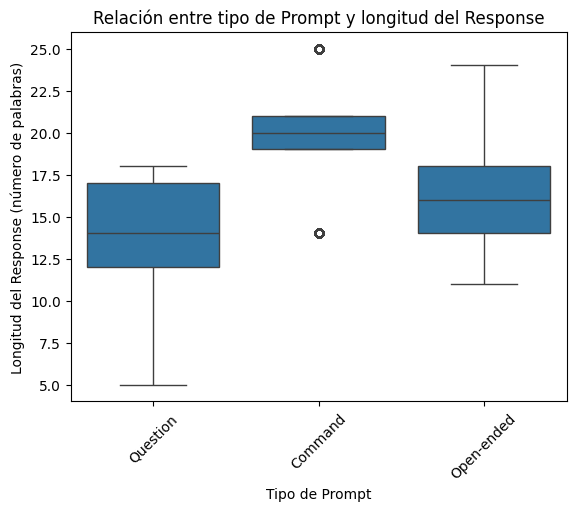

In [ ]:
sns.boxplot(x='Prompt_Type', y='Response_word_count', data=df)
plt.title('Relación entre tipo de Prompt y longitud del Response')
plt.xlabel('Tipo de Prompt')
plt.ylabel('Longitud del Response (número de palabras)')
plt.xticks(rotation=45)
plt.show()

Interpretación:

Como se ve en el boxplot los tipos de prompt open-ended y command tienden a generar repuestas más largas, en el caso de open-ended porque los prompts abiertos pueden obtener respuestas más elaboradas, ya que no tienen una restricción fija. Los prompts de tipo command suelen tener instrucciones y pasos, lo que puede llevar a tener respuestas esctructuradas y posiblemente más extensas. A diferencia de los prompts de tipo question que normalmente tienen respuestas más cortas y específicas, dependiendo de la complejidad de la pregunta.

    ¿Existe diferencias significativas hay en la longitud entre distintos tipos de prompt?

p-valor de ANOVA: 0.0000


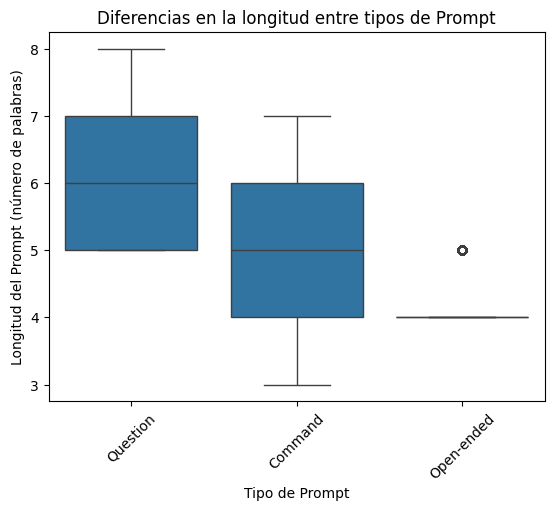

In [ ]:
from scipy.stats import f_oneway

# Realizar ANOVA
anova_result = f_oneway(
    *[df.loc[df['Prompt_Type'] == t, 'Response_word_count'] for t in df['Prompt_Type'].unique()]
)
print(f"p-valor de ANOVA: {anova_result.pvalue:.4f}")

sns.boxplot(x='Prompt_Type', y='Prompt_word_count', data=df)
plt.title('Diferencias en la longitud entre tipos de Prompt')
plt.xlabel('Tipo de Prompt')
plt.ylabel('Longitud del Prompt (número de palabras)')
plt.xticks(rotation=45)
plt.show()


Interpretación:

Los prompts de tipo question tienden a tener una mayor longitud, ya que las preguntas pueden incluir más detalles o un contexto para una mayor claridad.

Los prompts de tipo command tienden a tener una longitud intermedia, esto puede deberse a que los comandos suelen ser más específicos en sus instrucciones a diferencia de las preguntas.

Por ultimo los prompts de tipo open-ended generalmente tienen una menor longitud debido a que no dependen de un contexto o de una serie de instrucciones para plantearlos.

    ¿Qué tipo de prompt son los más comunes?

<ipython-input-112-219d0d98ab4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prompt_Type', data=df, order=df['Prompt_Type'].value_counts().index, palette='pastel')


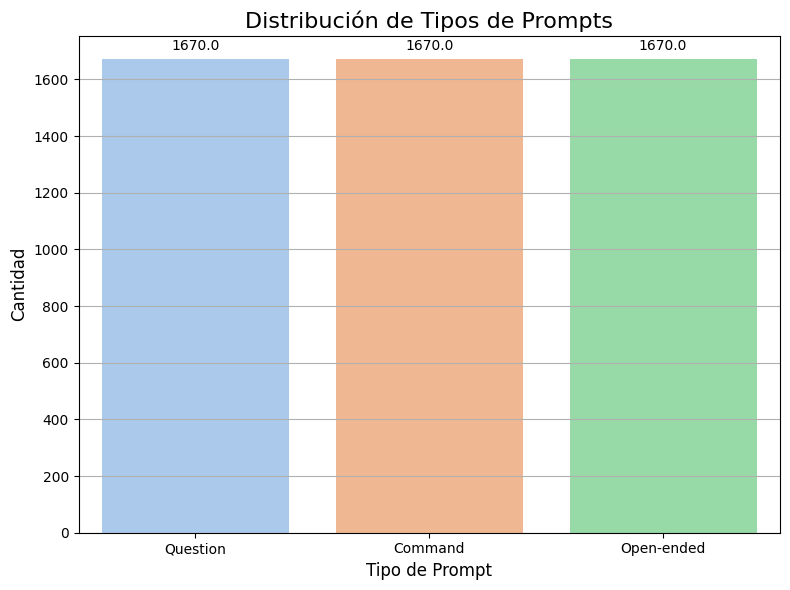

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Prompt_Type', data=df, order=df['Prompt_Type'].value_counts().index, palette='pastel')
plt.title('Distribución de Tipos de Prompts', fontsize=16)
plt.xlabel('Tipo de Prompt', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
 # Alinea las etiquetas del eje x
plt.grid(axis='y')

# Agregar etiquetas de valor a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

Interpretación:

Como se observa en la gráfica, podemos notar que los 3 tipos de prompts (Question, Command, Open-ended) tienen exactamente la misma cantidad. Por lo que concluimos en que el dataset esta perfectamente dividido en tipos de prompt.

    ¿Qué tipos de palabras son más frecuentes en los prompts y las response?

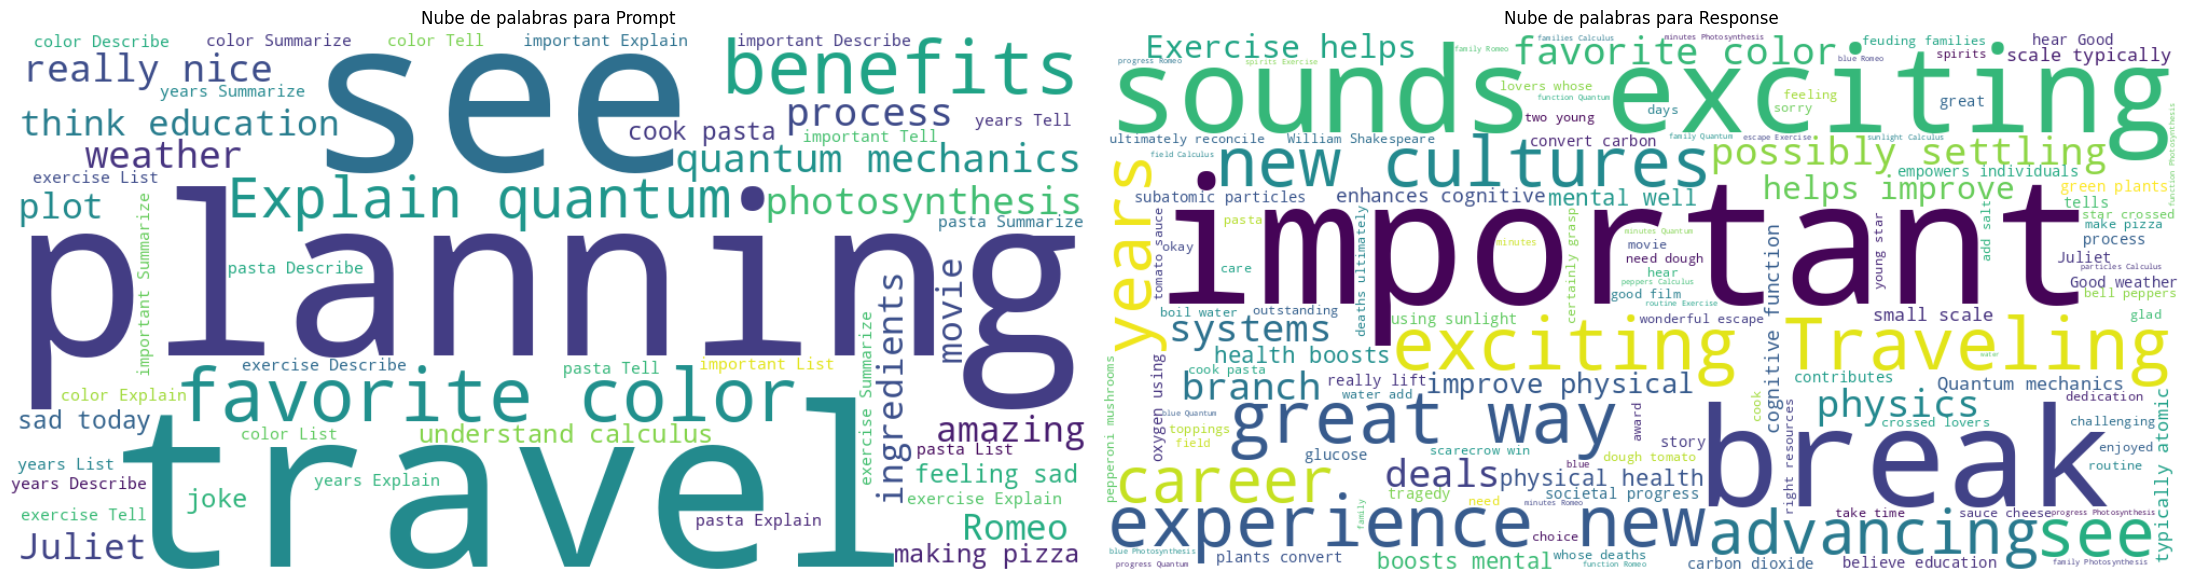

In [ ]:
from wordcloud import WordCloud

# Crear nubes de palabras para cada columna
columns = ['Prompt', 'Response']
plt.figure(figsize=(22, 10))

for i, col in enumerate(columns):
    plt.subplot(1, 2, i + 1)
    text = ' '.join(df[col].dropna())
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras para {col.capitalize()}')

plt.tight_layout()
plt.show()

Interpretación:

Luego de ver los tipos de palabras más frecuentes en los prompts y response, observamos que el dataset aborda más temas relacionados con planificación, viajes, explicar conceptos y temas sobre experiencias.

Palabras frecuentes como exciting, great y favorite nos indica que los temas pueden tener un estilo descriptivo o persuasivo, lo que puede ser ideal para prompts open-ended.

Palabras como see, break y way son palabras muy generales que requieren de un contexto por lo que tiene sentido de que sean tan frecuentes.

    ¿Qué frases o palabras clave en los prompt indican intenciones específicas del usuario (solicitar información, comandos, expresar emociones)?

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

<ipython-input-160-e540a78c743d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette=palette)


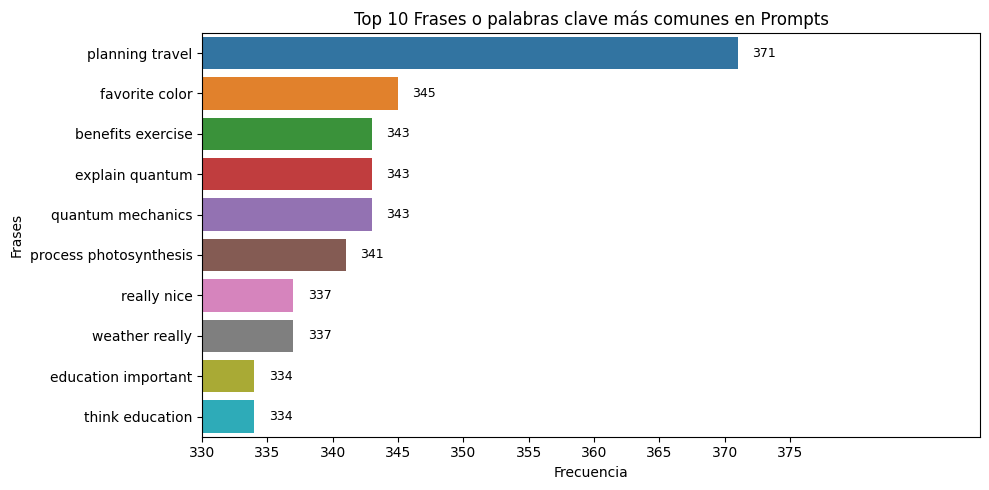

In [ ]:
# Extraer bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['Prompt_tokens'].apply(' '.join))
bigrams = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))

# Mostrar los bigramas/trigramas más comunes
top_ngrams = bigrams.most_common(10)
ngrams, counts = zip(*top_ngrams)


palette = sns.color_palette(n_colors=len(ngrams))
plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=ngrams, palette=palette)
plt.title('Top 10 Frases o palabras clave más comunes en Prompts')
plt.xlabel('Frecuencia')
plt.ylabel('Frases')

# Personalizar el eje y
plt.xlim(330, None)
plt.xticks(range(330, 380, 5))

for i, (count, ngram) in enumerate(zip(counts, ngrams)):
    plt.text(count + 2, i, str(count), ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Interpretación:

Frases como planning travel, explain quantum, quantum mechanics y process photosynthesis nos indican una intención de solicitar información por parte del usuario.

Frases como planning travel y benefits exercise están relacionadas con comandos que el usuario solicita.

En frases como favorite color y really nice, se observa el uso de adjetivos, lo que nos indica que estan relacionadas con emociones por parte del usuario.

    ¿Que tipos de signos de puntuación son más frecuentes en cada columna?

<ipython-input-173-3c12c1ebf72b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette= palette)
<ipython-input-173-3c12c1ebf72b>:9: UserWarning: 
The palette list has fewer values (10) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette= palette)


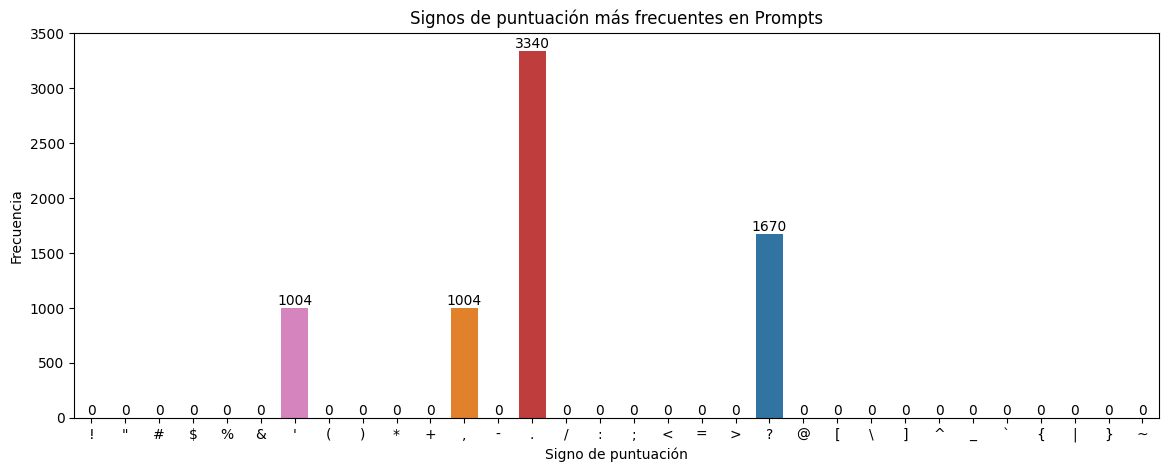

In [ ]:
import string

# Contar los signos de puntuación
punctuation_counts = {p: df['Prompt_punctuation'].apply(lambda x: x.count(p)).sum() for p in string.punctuation}

# Graficar
plt.figure(figsize=(14, 5))
palette = sns.color_palette(n_colors=len(ngrams))
sns.barplot(x=list(punctuation_counts.keys()), y=list(punctuation_counts.values()), palette= palette)
plt.title('Signos de puntuación más frecuentes en Prompts')
plt.xlabel('Signo de puntuación')
plt.ylabel('Frecuencia')

for i, (punctuation, count) in enumerate(punctuation_counts.items()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Interpretación:

Uso de apostrofes " ' ": Muchos de los prompts suelen tener contracciones por lo que nos indica una inclinación hacia el lenguaje conversacional o informal.

" , ": El uso frecuente de comas nos indica que tenemos prompts detallados que separan ideas relacionadas con comas y que también contienen enumeraciones.

" . ": El uso muy frecuente de puntos nos indica que gran parte de los prompts terminan en punto final y que también pueden estar compuestas por más de una oración.

" ? ": Nos indica una alta cantidad de preguntas.

    ¿Que proporción de tokens son stopwords en cada columna?

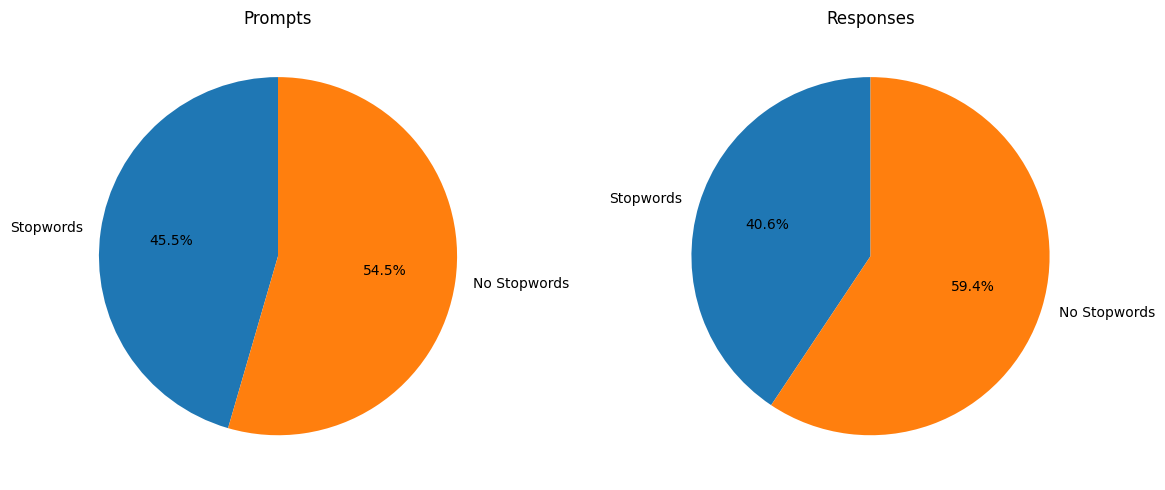

In [ ]:
prompt_stopword_ratio = df['Prompt_stopword_count'].sum() / df['Prompt_word_count'].sum()
response_stopword_ratio = df['Response_stopword_count'].sum() / df['Response_word_count'].sum()

labels = ['Stopwords', 'No Stopwords']
sizes_prompt = [prompt_stopword_ratio, 1 - prompt_stopword_ratio]
sizes_response = [response_stopword_ratio, 1 - response_stopword_ratio]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(sizes_prompt, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Prompts')

ax2.pie(sizes_response, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Responses')

plt.tight_layout()

plt.show()

Interpretación:

Los responses continen una proporción ligeramente menor de stopwords en comparación con los prompts. Lo cual nos indica que las respuestas por lo general son más informativas y tienen un contenido más relevante. Esto puede deberse a que las respuestas comunmente tienen más sustantivos, verbos y adjetivos para explicar o dar información, lo que disminuye la proporción de stopwords.